In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('machinehack-ode-to-code-tredence')
jovian.set_colab_id('1k5--hD8q0ln8nYzMNDY-A-IYJaeKsXIN')

# machinehack-ode-to-code-tredence

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 2.9 MB/s 


In [2]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="machinehack-ode-to-code-tredence", \
              git_message = "first commit from jovian",
              git_commit= True)
# it can work only when executing the notebook on the binder.

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/machinehack-ode-to-code-tredence


'https://jovian.ai/pknayak0707-job/machinehack-ode-to-code-tredence'

# Downloading the data form drive

In [3]:
from google.colab import drive
drive.mount('/content/drive',\
            force_remount=True)

Mounted at /content/drive


In [4]:
data_dir = '/content/drive/MyDrive/Professional/Coding Challenges/MachineHack/TredenceOdeToCode/dataset'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
train_org_df = pd.read_csv(data_dir+'/train.csv')
train_org_df.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [7]:
test_org_df = pd.read_csv(data_dir+'/test.csv')
test_org_df.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,4.68,x,w,f,x,w,8.22,9.58,n,t,NaN,g,NaN
1,p,10.33,x,y,f,a,y,11.98,13.29,y,t,NaN,d,NaN
2,p,9.26,x,w,t,NaN,w,7.41,12.68,w,t,l,g,NaN
3,p,14.90,s,w,t,d,w,5.33,23.03,w,f,f,d,NaN
4,p,1.01,x,w,f,a,w,3.17,1.64,e,f,f,l,NaN


In [8]:
sample_df = pd.read_csv(data_dir+'/sample_submission.csv')
sample_df.head()

,season
0,a
1,a
2,a
3,a
4,a


# Data Inspection

In [9]:
train_org_df.shape, test_org_df.shape

((42748, 14), (18321, 14))

In [10]:
train_org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42748 non-null  object 
 1   cap-diameter          42748 non-null  float64
 2   cap-shape             42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       35808 non-null  object 
 6   gill-color            42748 non-null  object 
 7   stem-height           42748 non-null  float64
 8   stem-width            42748 non-null  float64
 9   stem-color            42748 non-null  object 
 10  has-ring              42748 non-null  object 
 11  ring-type             41029 non-null  object 
 12  habitat               42748 non-null  object 
 13  season                42748 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.6+ MB


## Unique values

In [11]:
def unique_value_for_dataframe(df):
  for cols in df.columns:
    print('----------Unique values in "'+ cols +'" column-------------------')
    print(df[cols].unique())
    print('-----------End of unique values for "' + cols +'" columns ---------------\n' )

In [12]:
unique_value_for_dataframe(train_org_df)

----------Unique values in "edible-poisonous" column-------------------
['p' 'e']
-----------End of unique values for "edible-poisonous" columns ---------------

----------Unique values in "cap-diameter" column-------------------
[ 5.75  2.27  5.59 ... 53.34 50.17 18.77]
-----------End of unique values for "cap-diameter" columns ---------------

----------Unique values in "cap-shape" column-------------------
['x' 'o' 'c' 'f' 'b' 's' 'p']
-----------End of unique values for "cap-shape" columns ---------------

----------Unique values in "cap-color" column-------------------
['n' 'g' 'y' 'p' 'w' 'o' 'l' 'r' 'e' 'b' 'k' 'u']
-----------End of unique values for "cap-color" columns ---------------

----------Unique values in "does-bruise-or-bleed" column-------------------
['t' 'f']
-----------End of unique values for "does-bruise-or-bleed" columns ---------------

----------Unique values in "gill-attachment" column-------------------
['s' 'f' 'x' 'a' 'e' nan 'd' 'p']
-----------End of uni

## Null values Count

In [13]:
train_org_df.isna().sum()

edible-poisonous           0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         6940
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1719
habitat                    0
season                     0
dtype: int64

## Data types of the columns:

In [14]:
train_org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42748 non-null  object 
 1   cap-diameter          42748 non-null  float64
 2   cap-shape             42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       35808 non-null  object 
 6   gill-color            42748 non-null  object 
 7   stem-height           42748 non-null  float64
 8   stem-width            42748 non-null  float64
 9   stem-color            42748 non-null  object 
 10  has-ring              42748 non-null  object 
 11  ring-type             41029 non-null  object 
 12  habitat               42748 non-null  object 
 13  season                42748 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.6+ MB


## Inferences from the data inspected:

* 
* 
* 
* 

# Data Cleaning and Preparation

### gill-attachment

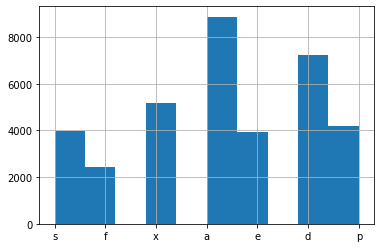

In [15]:
train_org_df['gill-attachment'].hist()

In [16]:
train_org_df.groupby('gill-attachment')['gill-attachment'].count().sort_values()

gill-attachment
f    2433
e    3939
s    3964
p    4205
x    5171
d    7222
a    8874
Name: gill-attachment, dtype: int64

In [17]:
train_org_df['gill-attachment'] = train_org_df['gill-attachment'].replace(np.nan, 'a' )
train_org_df.groupby('gill-attachment')['gill-attachment'].count()

gill-attachment
a    15814
d     7222
e     3939
f     2433
p     4205
s     3964
x     5171
Name: gill-attachment, dtype: int64

In [18]:
train_org_df['gill-attachment'].isna().sum()

0

### ring-type column

In [19]:
train_org_df.groupby('ring-type')['ring-type'].count().sort_values()

ring-type
m      243
g      853
p      877
r      992
l     1004
z     1493
e     1703
f    33864
Name: ring-type, dtype: int64

In [20]:
train_org_df['ring-type'] = train_org_df['ring-type'].replace(np.nan, 'f' )

In [21]:
train_org_df.groupby('ring-type')['ring-type'].count().sort_values()

ring-type
m      243
g      853
p      877
r      992
l     1004
z     1493
e     1703
f    35583
Name: ring-type, dtype: int64

In [22]:
train_org_df['gill-attachment'].isna().sum()

0

In [23]:
train_org_df.isna().sum()

edible-poisonous        0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

### Selecting necessary columns into input and target columns

In [24]:
train_org_df.columns

Index(['edible-poisonous', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object')

In [25]:
excluded_cols = ['season']

In [26]:
input_cols = [ col for col in train_org_df.columns if col not in excluded_cols]
target_col = 'season'
input_cols, target_col

(['edible-poisonous',
  'cap-diameter',
  'cap-shape',
  'cap-color',
  'does-bruise-or-bleed',
  'gill-attachment',
  'gill-color',
  'stem-height',
  'stem-width',
  'stem-color',
  'has-ring',
  'ring-type',
  'habitat'],
 'season')

In [27]:
train_org_df[input_cols].head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d


In [28]:
train_org_df[input_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42748 non-null  object 
 1   cap-diameter          42748 non-null  float64
 2   cap-shape             42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       42748 non-null  object 
 6   gill-color            42748 non-null  object 
 7   stem-height           42748 non-null  float64
 8   stem-width            42748 non-null  float64
 9   stem-color            42748 non-null  object 
 10  has-ring              42748 non-null  object 
 11  ring-type             42748 non-null  object 
 12  habitat               42748 non-null  object 
dtypes: float64(3), object(10)
memory usage: 4.2+ MB


In [29]:
numeric_cols = train_org_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_org_df[input_cols].select_dtypes('object').columns.tolist()
numeric_cols, categorical_cols

(['cap-diameter', 'stem-height', 'stem-width'],
 ['edible-poisonous',
  'cap-shape',
  'cap-color',
  'does-bruise-or-bleed',
  'gill-attachment',
  'gill-color',
  'stem-color',
  'has-ring',
  'ring-type',
  'habitat'])

In [30]:
'numeric_cols: '+str(len(numeric_cols)), "categorical_cols: " + str(len(categorical_cols))

('numeric_cols: 3', 'categorical_cols: 10')

### Scaling Numeric Features

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
scaler.fit(train_org_df[numeric_cols])
train_org_df[numeric_cols].describe().loc[['min','max'],:]

,cap-diameter,stem-height,stem-width
min,0.38,0.00,0.00
max,62.34,33.92,103.91


In [33]:
train_org_df[numeric_cols] = scaler.transform(train_org_df[numeric_cols])
train_org_df[numeric_cols].describe().loc[['min','max'],:]

,cap-diameter,stem-height,stem-width
min,0.0,0.0,0.0
max,1.0,1.0,1.0


### Encoding Categorical Data

In [34]:
train_org_df[categorical_cols].nunique()

edible-poisonous         2
cap-shape                7
cap-color               12
does-bruise-or-bleed     2
gill-attachment          7
gill-color              12
stem-color              13
has-ring                 2
ring-type                8
habitat                  8
dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train_org_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [37]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols,len(encoded_cols))

['edible-poisonous_e', 'edible-poisonous_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e', 'stem-color_f', 'stem-color_g', 'stem-color_k', 'stem-color_l', 'stem-color_n', 'stem-color_o', 'stem-color_p', 'stem-color_r', 'stem-color_u', 'stem-color_w', 'stem-color_y', 'has-ring_f', 'has-ring_t', 'ring-type_e', 'ring-type_f', 'ring-type_g'

In [38]:
train_org_df[encoded_cols] = encoder.transform(train_org_df[categorical_cols])

In [39]:
train_org_df.shape

(42748, 87)

# Splting the Dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
train_df, val_df = train_test_split(train_org_df, test_size=0.25, random_state=42)

In [42]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (32061, 87)
val_df.shape : (10687, 87)


# Training the Model

In [43]:
len(numeric_cols + encoded_cols),target_col

(76, 'season')

In [44]:
train_inputs = train_df[numeric_cols + encoded_cols].copy()
train_targets = train_df[target_col].copy()

In [45]:
diff_cols = [cols for cols in train_df.columns if cols not in train_inputs]
len(diff_cols) # original categorical columsna are removed from the columsn ist

11

In [46]:
train_inputs.shape, train_targets.shape

((32061, 76), (32061,))

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [48]:
#model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#model = LogisticRegression(multi_class='multinomial', solver='lbfgs',penalty="l2",C=0.1)

model = RandomForestClassifier(n_jobs=-1, random_state=42 )

#model = XGBClassifier(n_jobs=-1, random_state=42)

In [49]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [50]:
X, y = train_inputs, train_targets

In [51]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [52]:
from numpy import mean, std

In [53]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.516 (0.009)


In [ ]:
# #jovian.log_metrics(C="0.01",acc = "0.507")
# #jovian.log_metrics(C="0.0001",acc = "0.4909")
# #jovian.log_metrics(C="0.1",acc = "0.505")

# jovian.log_metrics(model="RandomforestClassifier",acc = "0.516")

# jovian.log_metrics(model="XGBoostClassifier",acc = "0.516")


[jovian] Metrics logged.
[jovian] Metrics logged.


# Making Prediction and Evaluating the model

In [54]:
X_train = train_inputs[numeric_cols + encoded_cols]

In [55]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y)

In [56]:
%time
model.fit(X_train, y,sample_weight=classes_weights)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


RandomForestClassifier(n_jobs=-1, random_state=42)

In [57]:
train_preds = model.predict(X_train)

In [58]:
from sklearn.metrics import f1_score

In [59]:
score_train = 100 * f1_score(train_targets, train_preds, average='macro')
score_train

99.40682705699024

In [60]:
X_val = val_df[numeric_cols + encoded_cols].copy()

In [61]:
val_preds = model.predict(X_val)

In [62]:
val_targets = val_df[target_col].copy()

In [63]:
X_val.shape,  val_preds.shape, val_targets.shape

((10687, 76), (10687,), (10687,))

In [64]:
score_val = 100 * f1_score(val_targets, val_preds, average='macro')
score_val

45.45675351983568

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
Committed successfully! https://jovian.ai/pknayak0707-job/machinehack-ode-to-code-tredence


'https://jovian.ai/pknayak0707-job/machinehack-ode-to-code-tredence'

# Predicting the values for the Test values

In [65]:
excluded_cols,input_cols, target_col

(['season'],
 ['edible-poisonous',
  'cap-diameter',
  'cap-shape',
  'cap-color',
  'does-bruise-or-bleed',
  'gill-attachment',
  'gill-color',
  'stem-height',
  'stem-width',
  'stem-color',
  'has-ring',
  'ring-type',
  'habitat'],
 'season')

## Scaling the Data

In [66]:
test_org_df [numeric_cols] = scaler.transform(test_org_df [numeric_cols])

In [67]:
test_org_df[numeric_cols].describe()

,cap-diameter,stem-height,stem-width
count,18321.000000,18321.000000,18321.000000
mean,0.103370,0.194106,0.117269
std,0.087225,0.099467,0.096067
min,0.000968,0.000000,0.000000
25%,0.050194,0.136498,0.050524
50%,0.089251,0.175708,0.099124
75%,0.132021,0.228774,0.160331
max,0.931730,0.944281,0.943124


## Encoding Categorical Data

In [68]:
test_org_df.isna().sum()

edible-poisonous            0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          2944
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                 752
habitat                     0
season                  18321
dtype: int64

In [69]:
test_null_value_cols = [ col for col in test_org_df.isna().sum().index if test_org_df.isna().sum()[col] > 0]
test_null_value_cols

['gill-attachment', 'ring-type', 'season']

In [70]:
unique_value_for_dataframe(test_org_df)

----------Unique values in "edible-poisonous" column-------------------
['e' 'p']
-----------End of unique values for "edible-poisonous" columns ---------------

----------Unique values in "cap-diameter" column-------------------
[0.06939961 0.16058748 0.14331827 ... 0.90929632 0.35393802 0.31891543]
-----------End of unique values for "cap-diameter" columns ---------------

----------Unique values in "cap-shape" column-------------------
['x' 's' 'p' 'f' 'o' 'b' 'c']
-----------End of unique values for "cap-shape" columns ---------------

----------Unique values in "cap-color" column-------------------
['w' 'y' 'n' 'g' 'b' 'r' 'e' 'p' 'o' 'u' 'k' 'l']
-----------End of unique values for "cap-color" columns ---------------

----------Unique values in "does-bruise-or-bleed" column-------------------
['f' 't']
-----------End of unique values for "does-bruise-or-bleed" columns ---------------

----------Unique values in "gill-attachment" column-------------------
['x' 'a' nan 'd' 'e' 'p' 

In [71]:
test_org_df['gill-attachment'] = test_org_df['gill-attachment'].replace(np.nan, 'a' )
test_org_df['ring-type'] = test_org_df['ring-type'].replace(np.nan, 'f' )

In [72]:
test_org_df.isna().sum()

edible-poisonous            0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment             0
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                  18321
dtype: int64

In [73]:
test_org_df[encoded_cols] = encoder.transform(test_org_df[categorical_cols])

In [74]:
test_org_df.shape

(18321, 87)

In [75]:
cols_list = [ col for col in train_org_df.columns if col not in test_org_df.columns ]
cols_list

[]

In [76]:
X_test = test_org_df[numeric_cols + encoded_cols].copy()

In [77]:
test_preds = model.predict(X_test)

In [78]:
X_test.shape,  test_preds.shape

((18321, 76), (18321,))

# Creating the Submission files


In [79]:
sub_df = pd.DataFrame()

In [80]:
sample_df.head()

,season
0,a
1,a
2,a
3,a
4,a


In [81]:
#sub_df['instance_id'] = test_org_df['instance_id']

In [82]:
sub_df['season'] = test_preds

In [83]:
sub_df['season'].unique()

array(['a', 'u', 'w', 's'], dtype=object)

In [84]:
sub_df.to_csv('rd_model_sub.csv', index= False)

In [85]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
